In [2]:
#importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
#loading data
df = pd.read_csv("Flyzy Flight Cancellation.csv")

In [4]:
df.head()

,Flight ID,Airline,Flight_Distance,Origin_Airport,Destination_Airport,Scheduled_Departure_Time,Day_of_Week,Month,Airplane_Type,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
0,7319483,Airline D,475,Airport 3,Airport 2,4,6,1,Type C,0.225122,5.0,2.151974,0.477202,0
1,4791965,Airline E,538,Airport 5,Airport 4,12,1,6,Type B,0.060346,68.0,1.600779,0.159718,1
2,2991718,Airline C,565,Airport 1,Airport 2,17,3,9,Type C,0.093920,18.0,4.406848,0.256803,0
3,4220106,Airline E,658,Airport 5,Airport 3,1,1,8,Type B,0.656750,13.0,0.998757,0.504077,1
4,2263008,Airline E,566,Airport 2,Airport 2,19,7,12,Type E,0.505211,4.0,3.806206,0.019638,0


In [5]:
df.tail()

,Flight ID,Airline,Flight_Distance,Origin_Airport,Destination_Airport,Scheduled_Departure_Time,Day_of_Week,Month,Airplane_Type,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
2995,1265781,Airline D,395,Airport 2,Airport 3,0,6,1,Type B,0.190018,1.00000,2.451216,0.283440,1
2996,5440150,Airline E,547,Airport 1,Airport 4,22,4,7,Type E,0.719271,91.00000,0.027039,0.665294,1
2997,779080,Airline C,461,Airport 1,Airport 3,8,3,1,Type B,0.458724,3.00000,1.131315,0.991307,0
2998,4044431,Airline B,464,Airport 3,Airport 3,5,5,3,Type E,0.443373,46.00000,0.968651,0.254808,1
2999,2806578,Airline A,369,Airport 1,Airport 2,1,1,10,Type A,0.704563,18.66667,1.879411,0.532486,1


In [6]:
df.shape

(3000, 14)

In [7]:
df.columns

Index(['Flight ID', 'Airline', 'Flight_Distance', 'Origin_Airport',
       'Destination_Airport', 'Scheduled_Departure_Time', 'Day_of_Week',
       'Month', 'Airplane_Type', 'Weather_Score',
       'Previous_Flight_Delay_Minutes', 'Airline_Rating', 'Passenger_Load',
       'Flight_Cancelled'],
      dtype='object')

Observation: Most of the column names consist of multiple words seperated by underscores,but 'Flight ID' does not
follow this format, therefore we need to change it to keep consistancy.

In [8]:
#Changing column name 
df.rename(columns={'Flight ID' : 'Flight_ID'}, inplace =True)

In [9]:
df.head(2)

,Flight_ID,Airline,Flight_Distance,Origin_Airport,Destination_Airport,Scheduled_Departure_Time,Day_of_Week,Month,Airplane_Type,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled
0,7319483,Airline D,475,Airport 3,Airport 2,4,6,1,Type C,0.225122,5.0,2.151974,0.477202,0
1,4791965,Airline E,538,Airport 5,Airport 4,12,1,6,Type B,0.060346,68.0,1.600779,0.159718,1


**CHECKING DATA TYPES OF EACH COLUMN**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Flight_ID                      3000 non-null   int64  
 1   Airline                        3000 non-null   object 
 2   Flight_Distance                3000 non-null   int64  
 3   Origin_Airport                 3000 non-null   object 
 4   Destination_Airport            3000 non-null   object 
 5   Scheduled_Departure_Time       3000 non-null   int64  
 6   Day_of_Week                    3000 non-null   int64  
 7   Month                          3000 non-null   int64  
 8   Airplane_Type                  3000 non-null   object 
 9   Weather_Score                  3000 non-null   float64
 10  Previous_Flight_Delay_Minutes  3000 non-null   float64
 11  Airline_Rating                 3000 non-null   float64
 12  Passenger_Load                 3000 non-null   f

**Observation: This results indicate that all columns have the correct data types according to the data they contain**

In [11]:
#Checking for duplicates entries 
duplicates = df[df.duplicated()]

In [12]:
duplicates

,Flight_ID,Airline,Flight_Distance,Origin_Airport,Destination_Airport,Scheduled_Departure_Time,Day_of_Week,Month,Airplane_Type,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled


No duplicates on the dataset

**CHECKING FOR MISSING VALUES**

In [13]:
df.isnull().sum()

Flight_ID                        0
Airline                          0
Flight_Distance                  0
Origin_Airport                   0
Destination_Airport              0
Scheduled_Departure_Time         0
Day_of_Week                      0
Month                            0
Airplane_Type                    0
Weather_Score                    0
Previous_Flight_Delay_Minutes    0
Airline_Rating                   0
Passenger_Load                   0
Flight_Cancelled                 0
dtype: int64

**There are no missing values**

**CHECKING FOR OUTLIERS**

In [22]:
#Used boxplot to visually check outliers

In [14]:
columns_to_check =['Flight_Distance',
          'Scheduled_Departure_Time',
          'Weather_Score',
          'Previous_Flight_Delay_Minutes', 
          'Airline_Rating', 'Passenger_Load',
          'Flight_Cancelled'
         ]

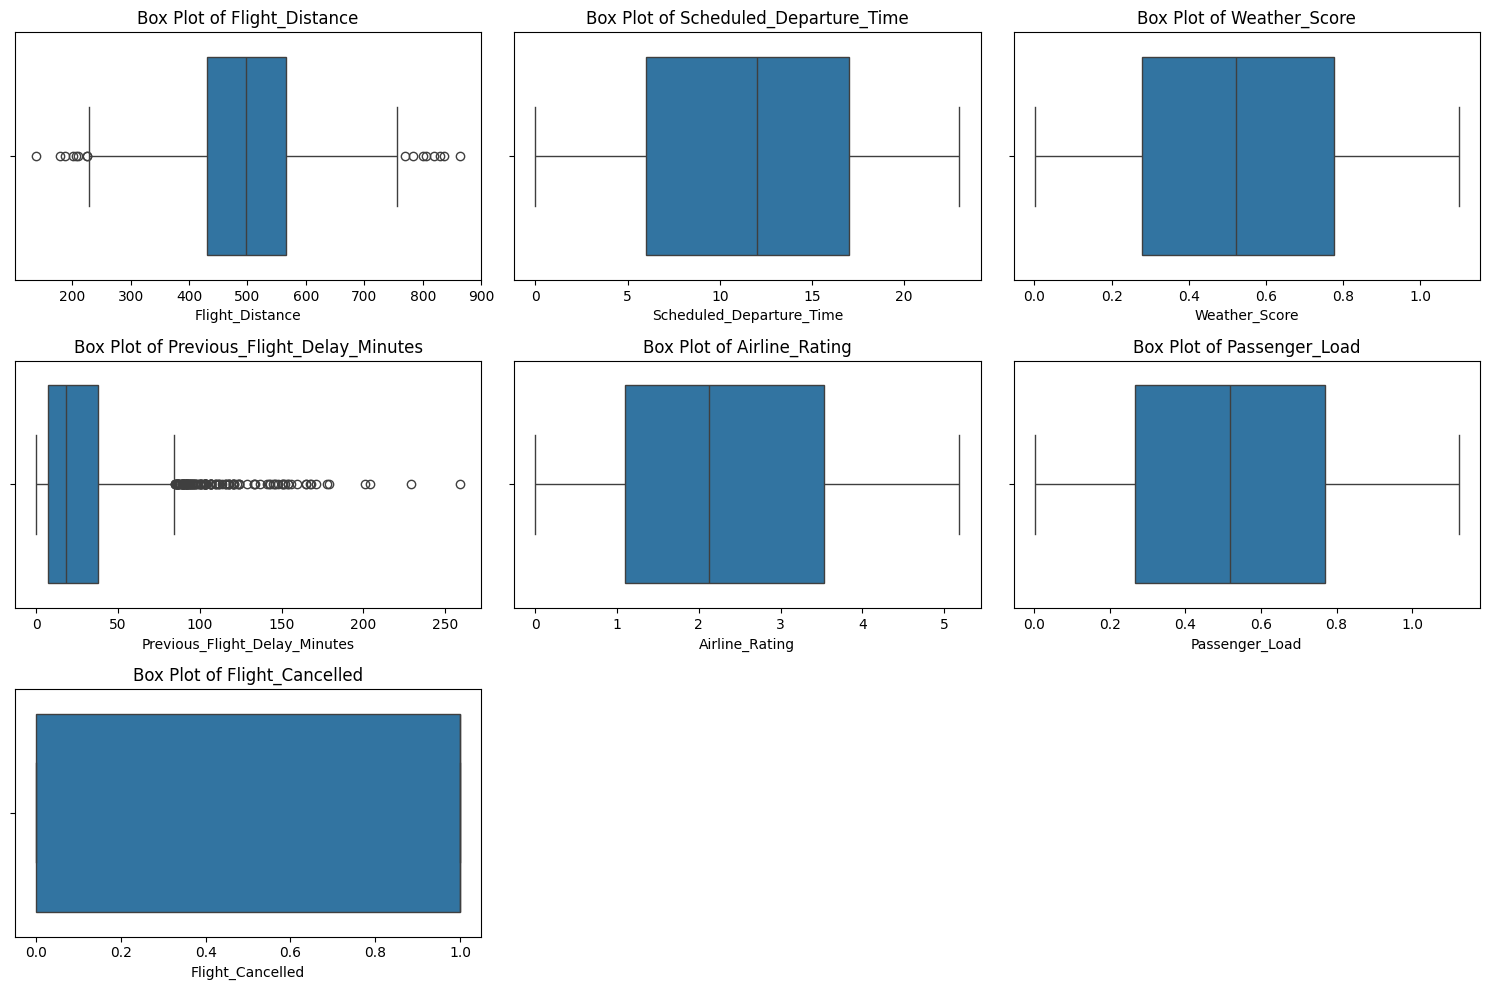

In [15]:
plt.figure(figsize =(15,10))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(3,3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

This plots shows that the following columns have outliers and have to be handled 
1. Flight_Distance
2. Previous_Flight_Delay_Minutes

1. Handling outliers for Flight_Distance column using Capping method 
Because it reduces the impact of extreme outliers, which can distort the analysis.

In [16]:
#Handling outliers on Flight Distance using Capping approach 

#applying threshold
cap_max = df['Flight_Distance'].quantile(0.95)
cap_min =df['Flight_Distance'].quantile(0.05)
#Apply capping
df['Capped_Flight_Distance'] = np.clip(df['Flight_Distance'], cap_min, cap_max)


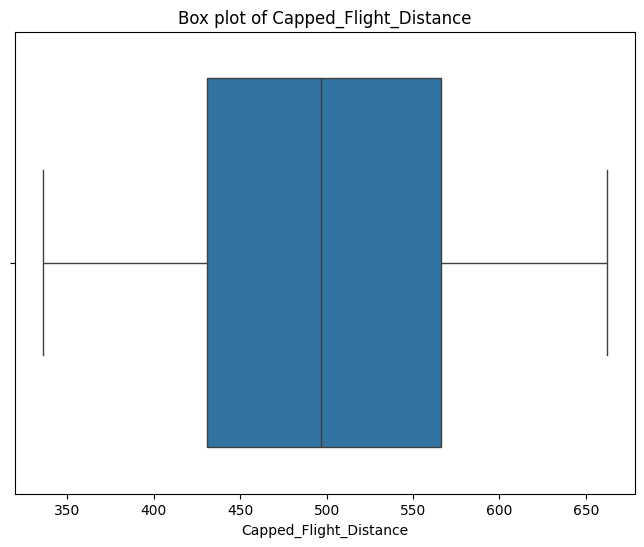

In [16]:
#Plotting transformed column
plt.figure(figsize =(8,6))
sns.boxplot(x=df['Capped_Flight_Distance'])
plt.title('Box plot of Capped_Flight_Distance')
plt.show()

**The results shows no more outliers for Flight_Distance**

2. Handling Outliers for Previous_Flight_Delay_Minutes Using Log Transformation
because data is skewed,  compressing the range of delay times, reducing the impact of extreme values.

In [17]:
#creating a new column and applying the log
df['Log_Previous_Flight_Delay_Minutes'] = np.log1p(df['Previous_Flight_Delay_Minutes'])

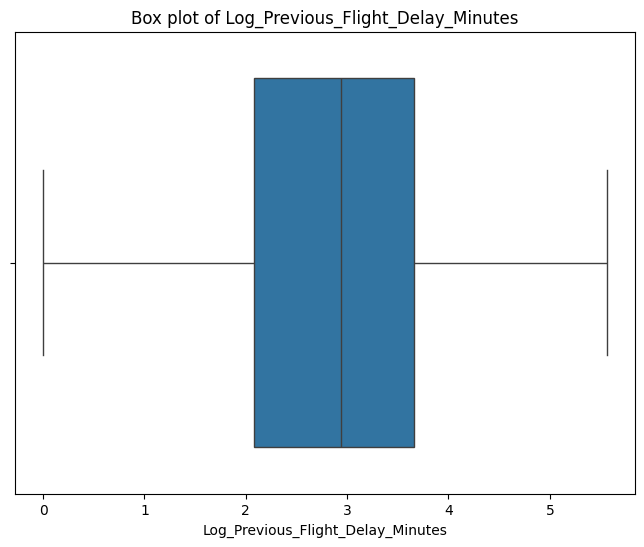

In [18]:
#Plotting transformed column
plt.figure(figsize =(8,6))
sns.boxplot(x=df['Log_Previous_Flight_Delay_Minutes'])
plt.title('Box plot of Log_Previous_Flight_Delay_Minutes')
plt.show()

**Now the outliers were handled and not showing on the plot**

In [19]:
df.head(2)

,Flight_ID,Airline,Flight_Distance,Origin_Airport,Destination_Airport,Scheduled_Departure_Time,Day_of_Week,Month,Airplane_Type,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled,Capped_Flight_Distance,Log_Previous_Flight_Delay_Minutes
0,7319483,Airline D,475,Airport 3,Airport 2,4,6,1,Type C,0.225122,5.0,2.151974,0.477202,0,475,1.791759
1,4791965,Airline E,538,Airport 5,Airport 4,12,1,6,Type B,0.060346,68.0,1.600779,0.159718,1,538,4.234107


In [20]:
df.shape

(3000, 16)

**EXPLORATORY DATA ANALYSIS**

**DESCRIPTIVE STATISTICS**

In [23]:
df.describe()

,Flight_ID,Flight_Distance,Scheduled_Departure_Time,Day_of_Week,Month,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled,Capped_Flight_Distance,Log_Previous_Flight_Delay_Minutes
count,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,4.997429e+06,498.909333,11.435000,3.963000,6.381000,0.524023,26.793383,2.317439,0.515885,0.690667,499.040333,2.809515
std,2.868139e+06,98.892266,6.899298,2.016346,3.473979,0.290694,27.874733,1.430386,0.295634,0.462296,90.845038,1.121865
min,3.681000e+03,138.000000,0.000000,1.000000,1.000000,0.000965,0.000000,0.000103,0.001039,0.000000,336.000000,0.000000
25%,2.520313e+06,431.000000,6.000000,2.000000,3.000000,0.278011,7.000000,1.092902,0.265793,0.000000,431.000000,2.079442
50%,5.073096e+06,497.000000,12.000000,4.000000,6.000000,0.522180,18.000000,2.126614,0.517175,1.000000,497.000000,2.944439
75%,7.462026e+06,566.000000,17.000000,6.000000,9.000000,0.776323,38.000000,3.525746,0.770370,1.000000,566.000000,3.663562
max,9.999011e+06,864.000000,23.000000,7.000000,12.000000,1.099246,259.000000,5.189038,1.123559,1.000000,662.000000,5.560682


The above shows statistical analysis for various features.

Examples,We can see the longest flight delay 
of 250 minutes from the previous flight delay minutes and also highest and lowest Airline ratings amongst other observations

**DATA DISTRIBUTION**

Numerical Columns 

In [21]:
df.columns 

Index(['Flight_ID', 'Airline', 'Flight_Distance', 'Origin_Airport',
       'Destination_Airport', 'Scheduled_Departure_Time', 'Day_of_Week',
       'Month', 'Airplane_Type', 'Weather_Score',
       'Previous_Flight_Delay_Minutes', 'Airline_Rating', 'Passenger_Load',
       'Flight_Cancelled', 'Capped_Flight_Distance',
       'Log_Previous_Flight_Delay_Minutes'],
      dtype='object')

In [23]:
#Selecting relevant numerical columns 
numerical_columns = [
    'Flight_Distance', 'Weather_Score', 'Previous_Flight_Delay_Minutes', 
    'Airline_Rating', 'Passenger_Load', 'Capped_Flight_Distance', 
    'Log_Previous_Flight_Delay_Minutes'
]

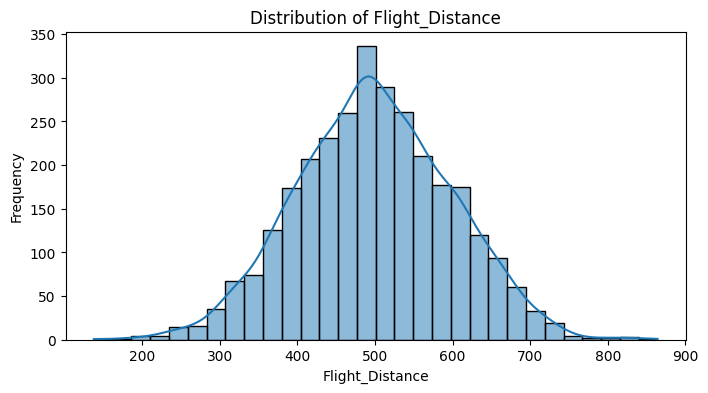

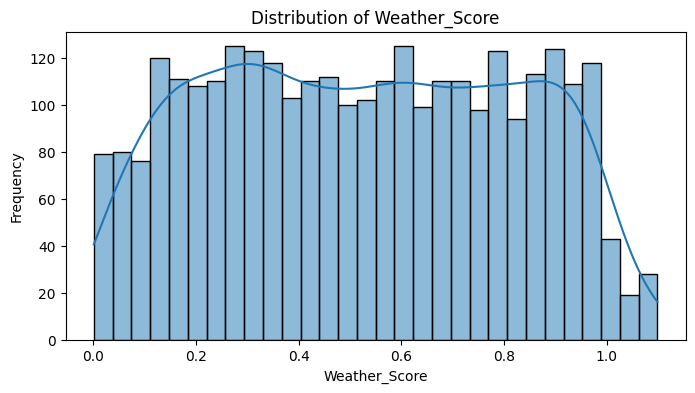

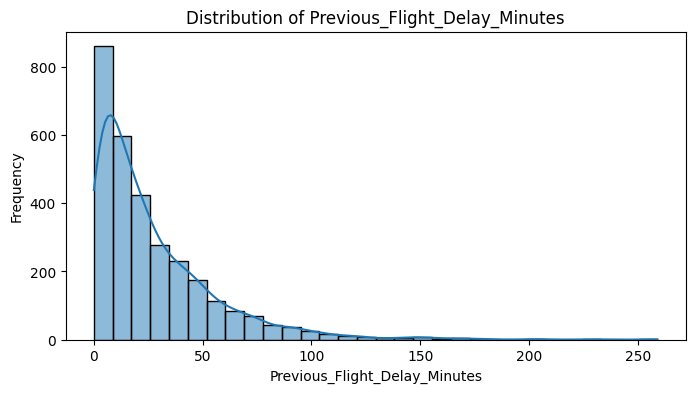

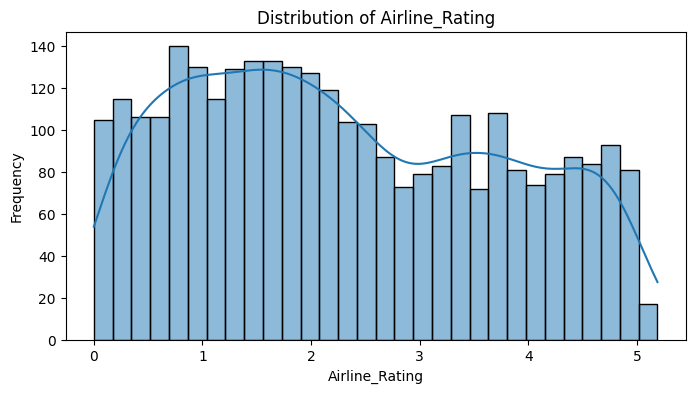

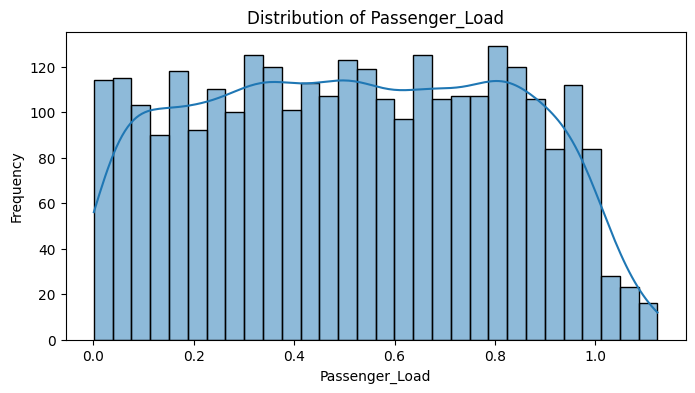

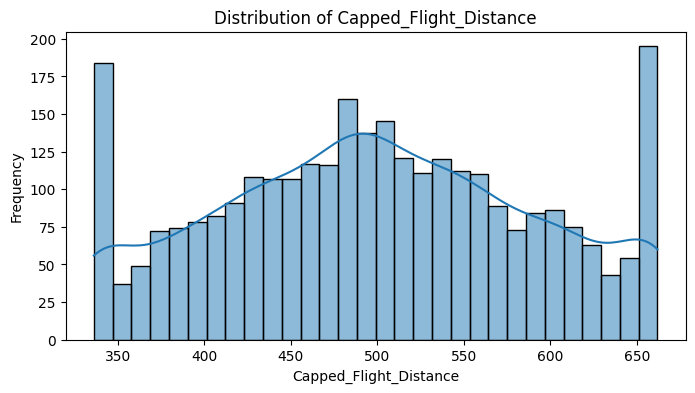

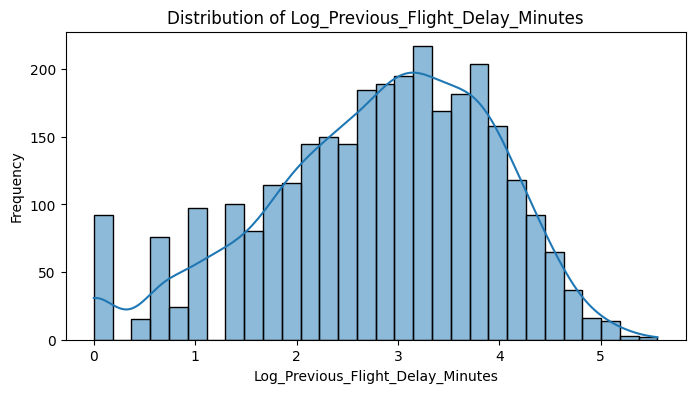

In [24]:
# Plotting the distribution for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)  #
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

From this , we can see various distribution of the numerical columns

**Now checking categorial columns**

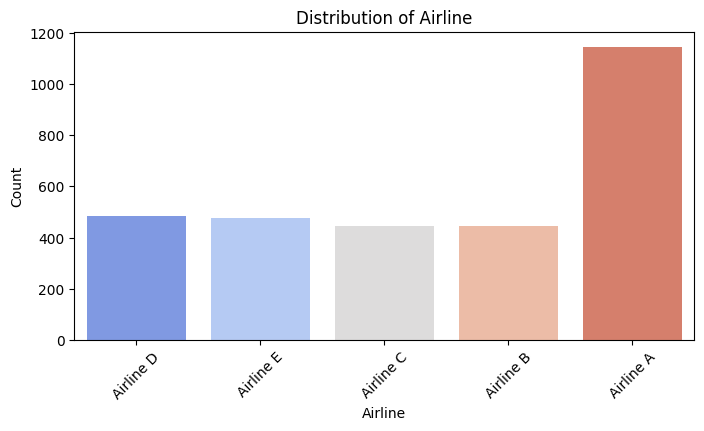

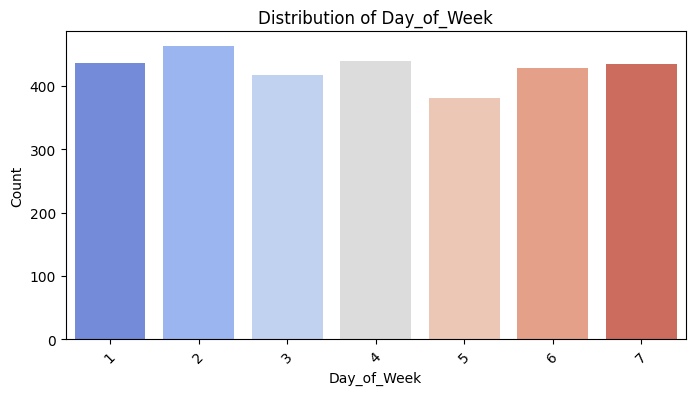

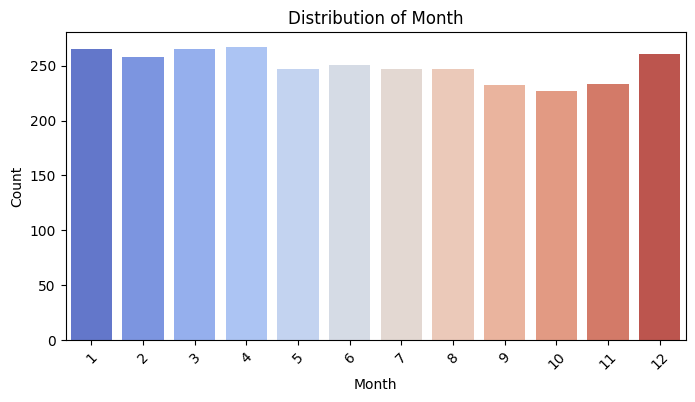

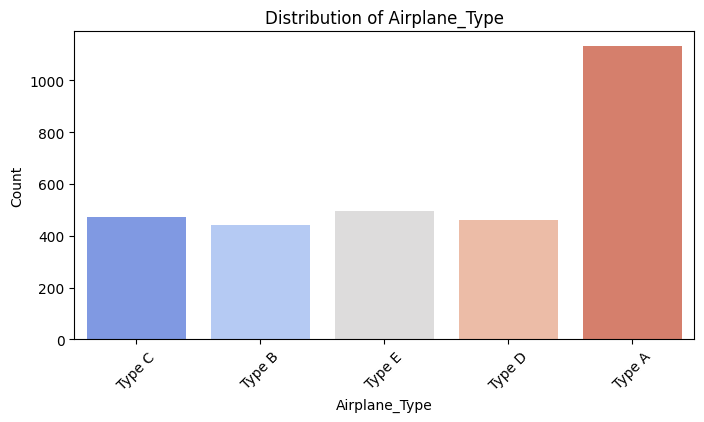

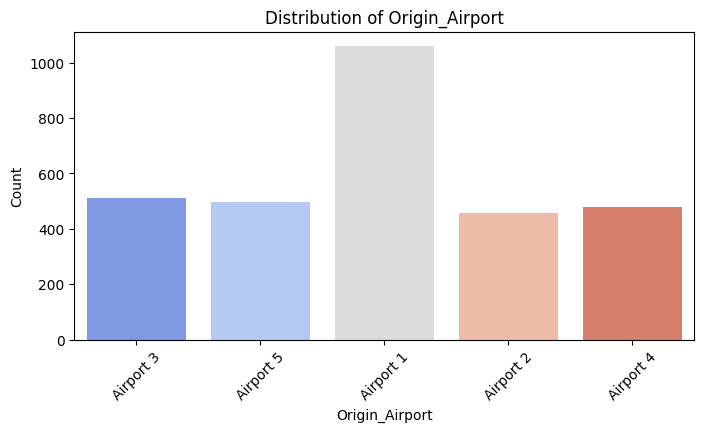

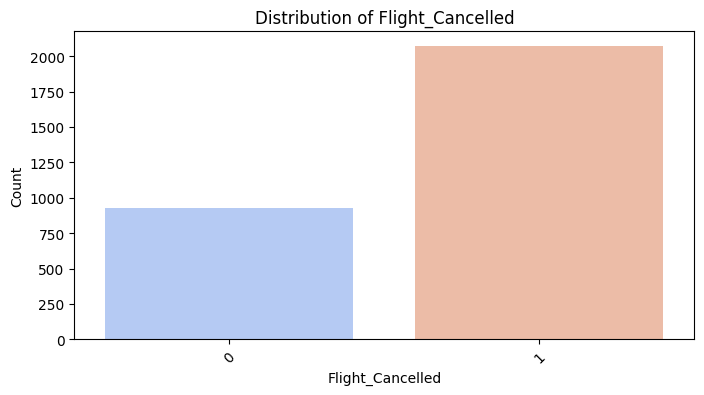

In [28]:
import warnings
warnings.filterwarnings("ignore")
#selecting columns to check 
categorical_columns = ['Airline','Day_of_Week', 'Month', 'Airplane_Type','Origin_Airport','Flight_Cancelled']

# Plotting the distribution for each categorical column
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col], palette='coolwarm')  # Countplot to show the frequency of each category
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x labels if needed for readability
    plt.show()

Data from Flight_Cancelled target column is highly imbalanced, we have more occurances of cancelled flights than non cancelled.

There is also a noticeable high occurance of :

TypeA flight than other flights

AirlineA than other airlines

Airport1 than other airports

Month and day of the week: there is slight difference between various months and various days of the week

**RELATIONSHIP BETWEEN FEATURES:**

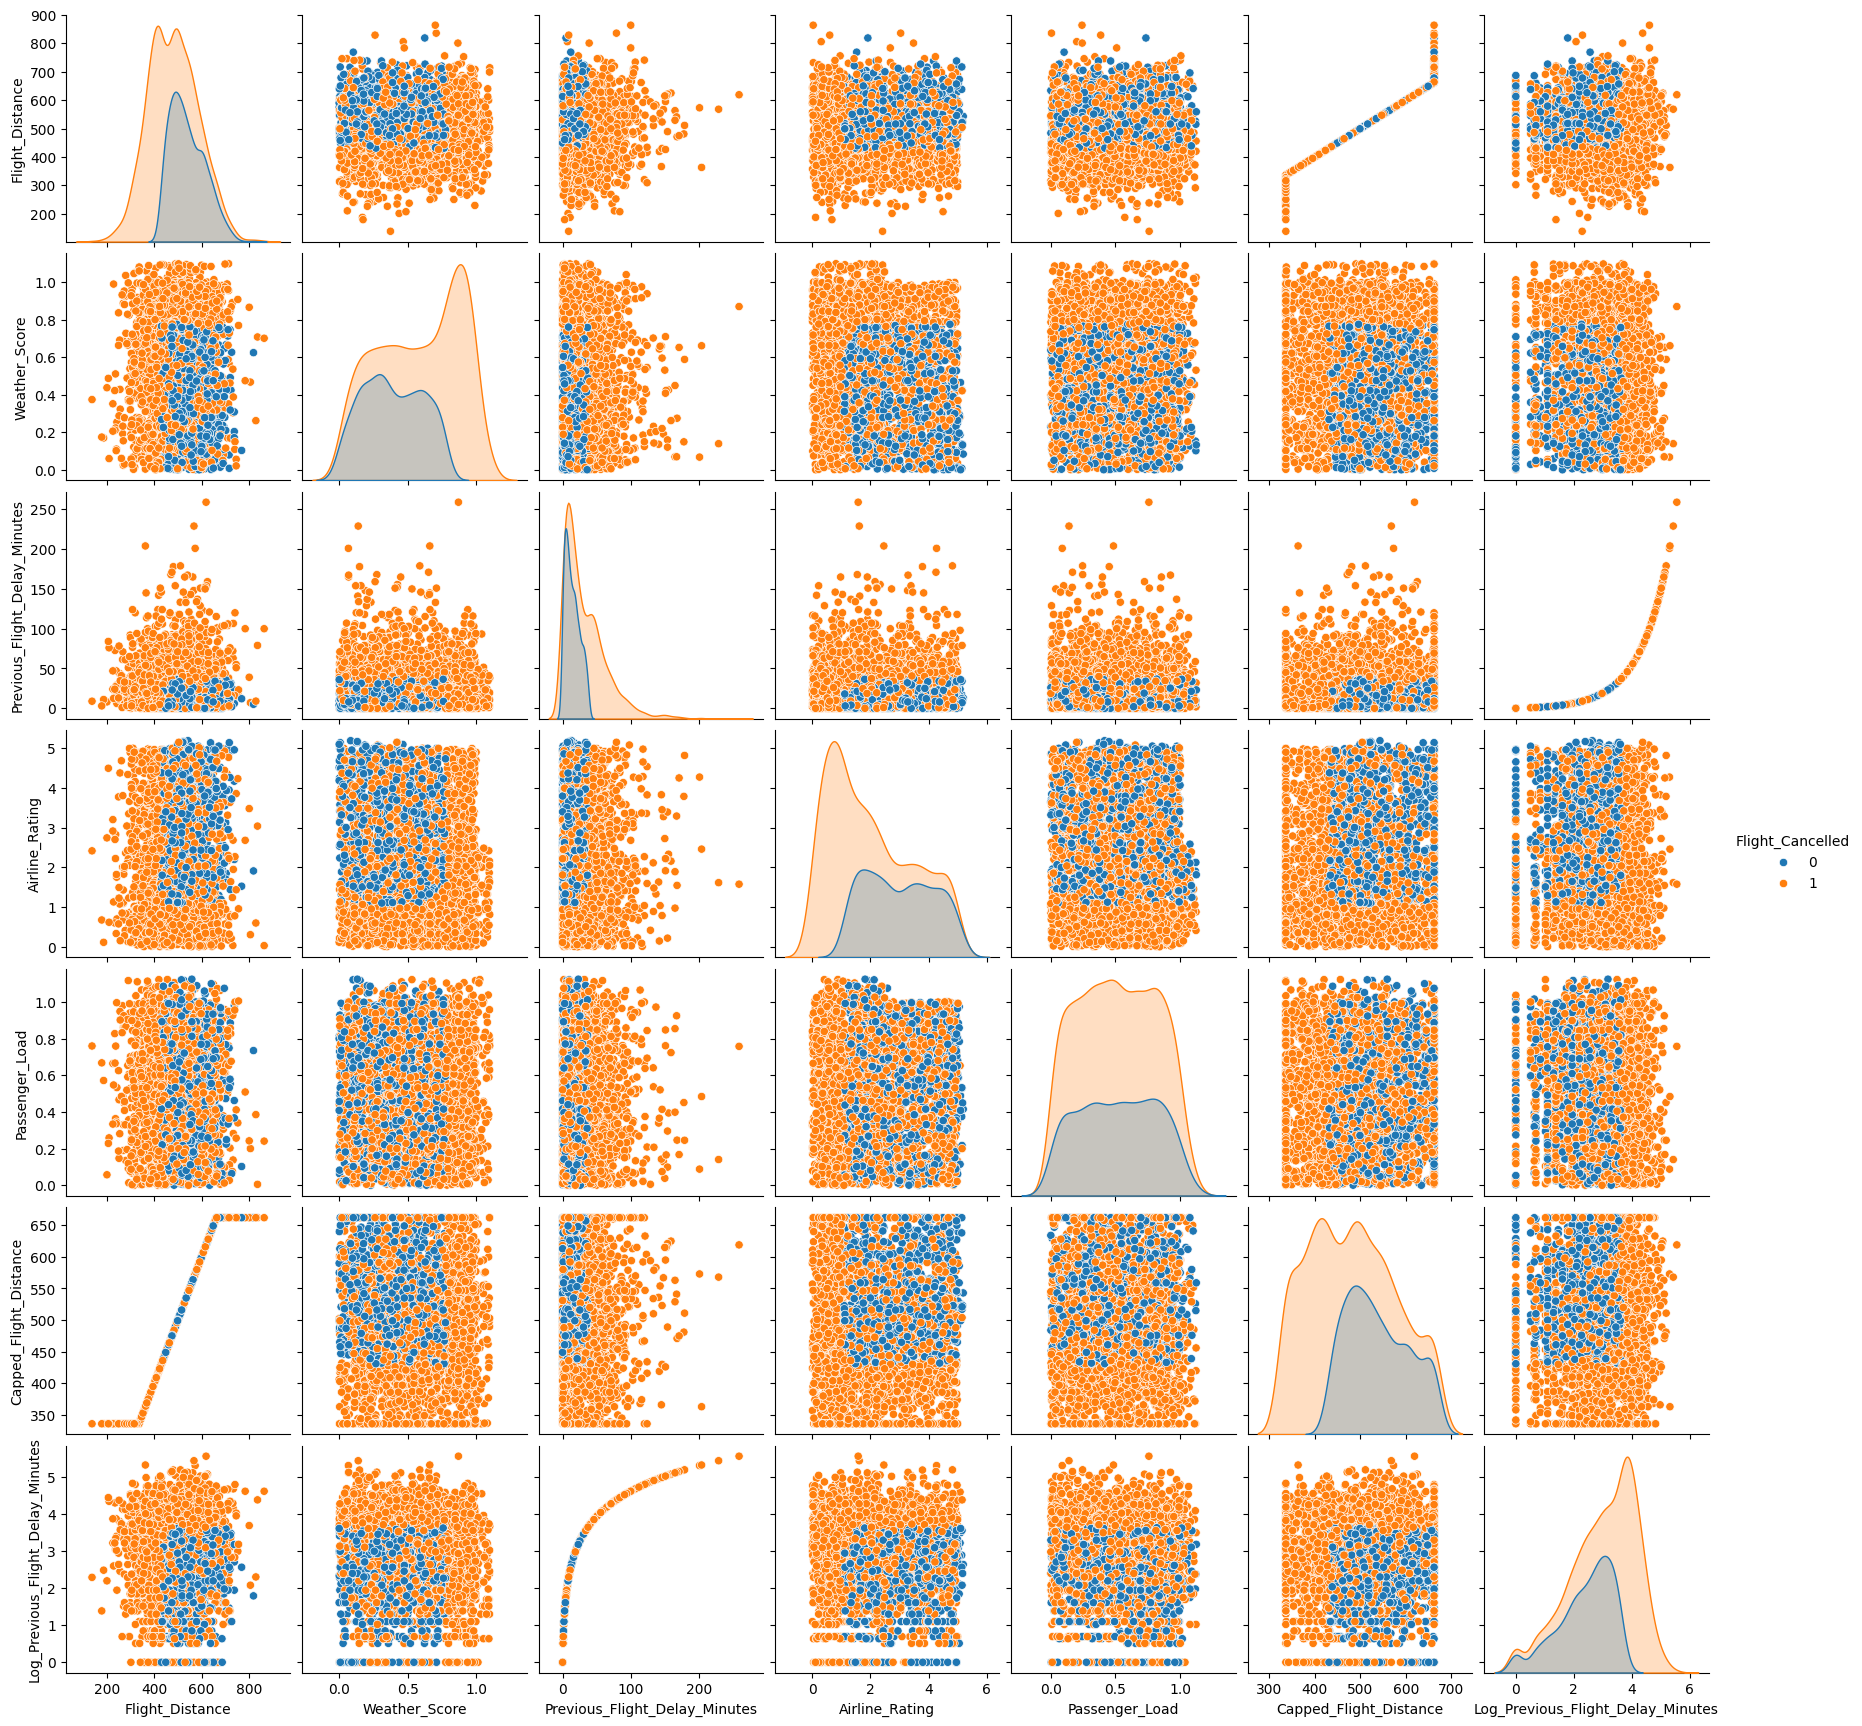

In [32]:
#pairplots
sns.pairplot(df, hue ='Flight_Cancelled', vars=numerical_columns)
plt.show()

In [50]:
#Correlation matrix to understand the relationships better
df.select_dtypes(include ="number").corr()

,Flight_ID,Flight_Distance,Scheduled_Departure_Time,Day_of_Week,Month,Weather_Score,Previous_Flight_Delay_Minutes,Airline_Rating,Passenger_Load,Flight_Cancelled,Capped_Flight_Distance,Log_Previous_Flight_Delay_Minutes
Flight_ID,1.000000,-0.007541,0.006207,-0.012384,-0.025743,-0.002007,0.006172,0.043170,0.009312,-0.009101,-0.007407,0.011250
Flight_Distance,-0.007541,1.000000,0.039727,0.024455,0.019573,0.010139,0.018413,0.042128,-0.018627,-0.277471,0.988170,0.008974
Scheduled_Departure_Time,0.006207,0.039727,1.000000,-0.011834,0.018319,-0.023682,-0.036318,0.040739,0.046556,-0.043733,0.033209,-0.032594
Day_of_Week,-0.012384,0.024455,-0.011834,1.000000,-0.016790,0.020231,0.010572,0.001148,-0.011712,-0.008705,0.027845,0.015538
Month,-0.025743,0.019573,0.018319,-0.016790,1.000000,-0.011544,-0.006402,0.038264,-0.003430,-0.004242,0.016614,-0.008663
Weather_Score,-0.002007,0.010139,-0.023682,0.020231,-0.011544,1.000000,-0.043096,-0.064427,-0.005269,0.305762,0.005769,-0.014517
Previous_Flight_Delay_Minutes,0.006172,0.018413,-0.036318,0.010572,-0.006402,-0.043096,1.000000,-0.036031,-0.069502,0.302805,0.016618,0.826976
Airline_Rating,0.043170,0.042128,0.040739,0.001148,0.038264,-0.064427,-0.036031,1.000000,-0.021431,-0.314099,0.042360,-0.026244
Passenger_Load,0.009312,-0.018627,0.046556,-0.011712,-0.003430,-0.005269,-0.069502,-0.021431,1.000000,-0.008320,-0.018177,-0.061083
Flight_Cancelled,-0.009101,-0.277471,-0.043733,-0.008705,-0.004242,0.305762,0.302805,-0.314099,-0.008320,1.000000,-0.286182,0.254841


<Axes: >

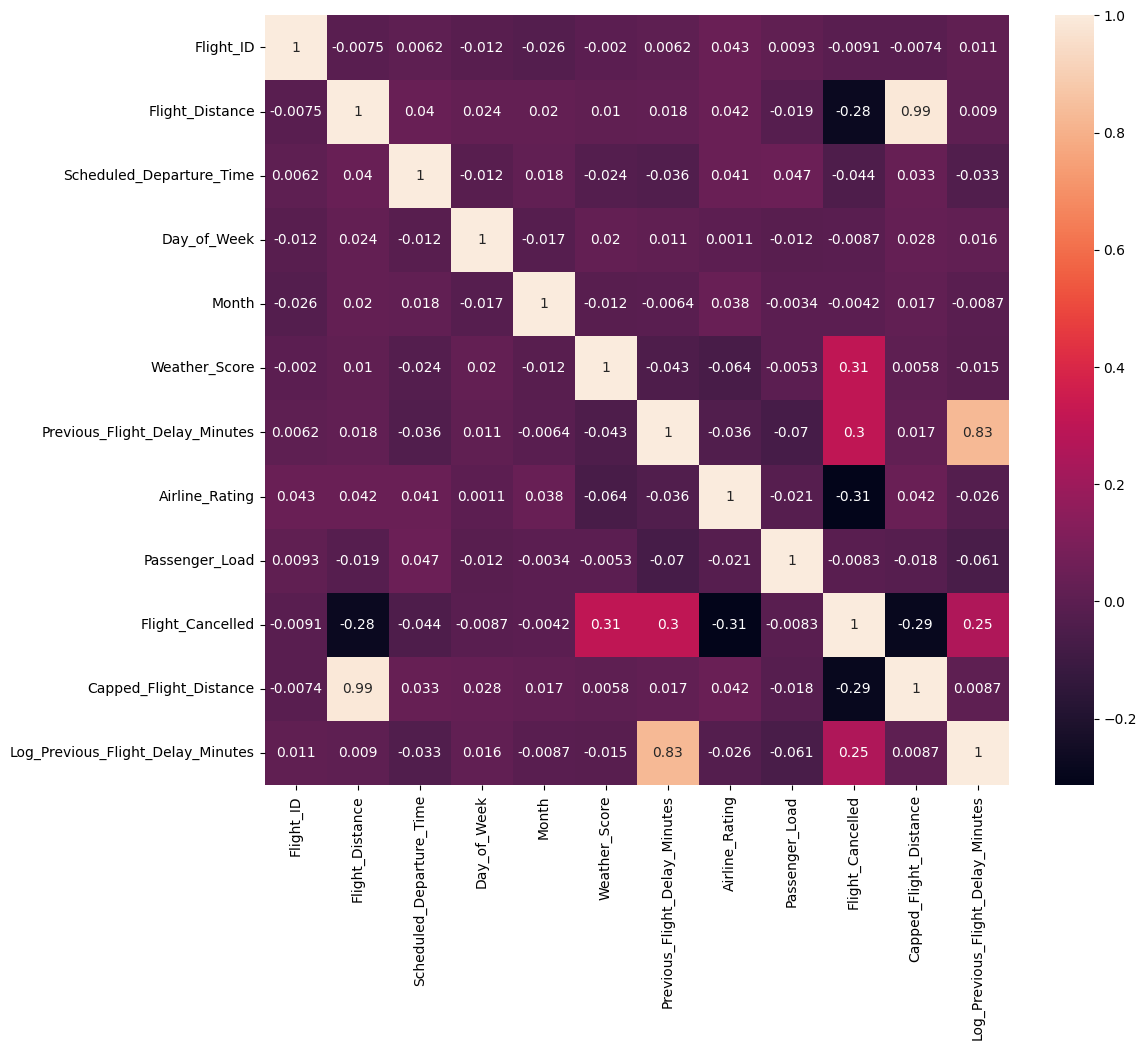

In [53]:
#Visualising the relationships using Heatmap
plt.figure(figsize =(12,10))
sns.heatmap(df.select_dtypes(include ="number").corr(), annot = True)

**Relationship Insights:**

Flight_Distance & Capped_Flight_Distance are strongly correlated since"Capped_Flight_Distance" is derived from "Flight_Distance" while managing outliers.

Similarly for Previous_Flight_Delay_Minutes & Log_Previous_Flight_Delay_Minutes (0.827)

Flight_Cancelled & Weather_Score (0.306): There's a moderate positive correlation indicating that poor weather may be associated with more cancellations.


Flight_Cancelled & Previous_Flight_Delay_Minutes (0.303): A moderate positive correlation suggesting that flights with previous delays might have a higher chance of being cancelled.

Scheduled_Departure_Time & Passenger_Load (0.047): Slight positive correlation but not strong.

Flight_Distance & Passenger_Load (-0.0186): A weak negative correlation

Airline_Rating & Previous_Flight_Delay_Minutes (-0.0360): A weak negative correlation, indicating that higher delays are not strongly related to airline ratings.

Airline_Rating & Flight_Cancelled (-0.314): A moderate negative correlation, indicating that lower airline ratings might be associated with higher chances of cancellation.

Day_of_Week, Month: weak correlations with other variables, indicating that the day of the week and month might not have strong impacts on flight cancellations.

**RELATIONSHIP BETWEEN FEATURES AND TARGET COLUMN**

**Based on the investigations from the Correlation matrix and Heatmap above, below are the observations:**

**Flight_Distance** - there is a moderate negative  correlation between Flight_Distance and Flight_Cancelled, 
suggesting flight distance might not be highly influencial 

**Scheduled_Departure_Time** , correlation is very close to zero indicating weak correlation with Flight_Cancelled, 
therefore might not be a significant predictor for flight cancellations 

**Day_of_Week and Month**, also shows weak correlation with the target column , suggesting not much impact on flight cancellations 

**Weather_Score**, shows moderate postive correlation with target column indicating worse weather conditions can influence flight cancellations, 
this is very important for predicting cancellations 

**Previous_Flight_Minutes_Minutes,** there is moderate postive correlation suggesting previous delays could influence cancellations

**Airline_Rating**, shows moderate negative correlation with the target, it indicate flights with lower airline rating are likely to be cancelled 

**Passenger_Load**, weak correlation indicating number of passengers not impacting flight cancellations 

**Capped_Flight_Distance**, similar to original Flight_Distance, moderate negative correlation

**Log_Transformed_Delay_Minutes**, also similar to the original Previous_Flight_Delay_Minutes although slitly lower than orignal
but it still indicates delays are positively associated with cancellations.

****************************************